In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('houseprice.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [6]:
df["furnishingstatus"] = df["furnishingstatus"].apply(lambda x: 1 if x == 'furnished' else 0)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


<Axes: xlabel='area', ylabel='price'>

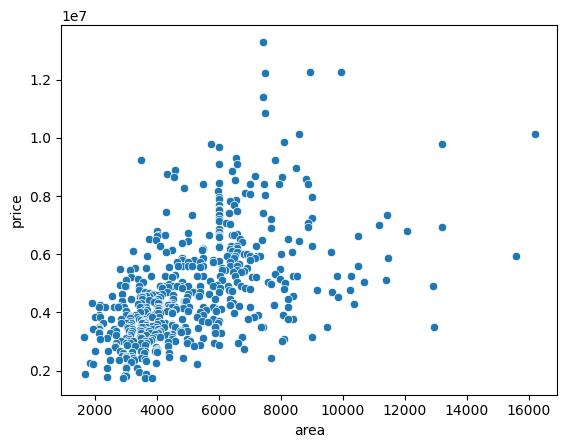

In [29]:
sns.scatterplot(data=df, x='area', y='price')

<Axes: ylabel='price'>

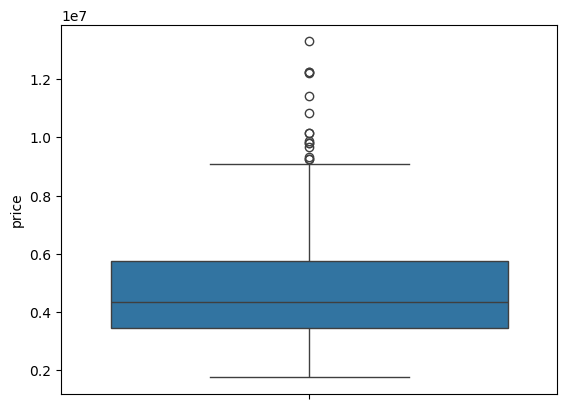

In [30]:
sns.boxplot(y=df['price'])

In [7]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print(f"Outliers:\n{outliers}")

Outliers:
       price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0   13300000   7420         4          2        3         1          0   
1   12250000   8960         4          4        4         1          0   
2   12250000   9960         3          2        2         1          0   
3   12215000   7500         4          2        2         1          0   
4   11410000   7420         4          1        2         1          1   
5   10850000   7500         3          3        1         1          0   
6   10150000   8580         4          3        4         1          0   
7   10150000  16200         5          3        2         1          0   
8    9870000   8100         4          1        2         1          1   
9    9800000   5750         3          2        4         1          1   
10   9800000  13200         3          1        2         1          0   
11   9681000   6000         4          3        2         1          1   
12   9310000   6550         

In [32]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.256881
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.437314
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [33]:
df.head()
df.shape[0]

545

In [8]:
df_cleaned = df[df['price'] <= 10000000]

<Axes: xlabel='area', ylabel='price'>

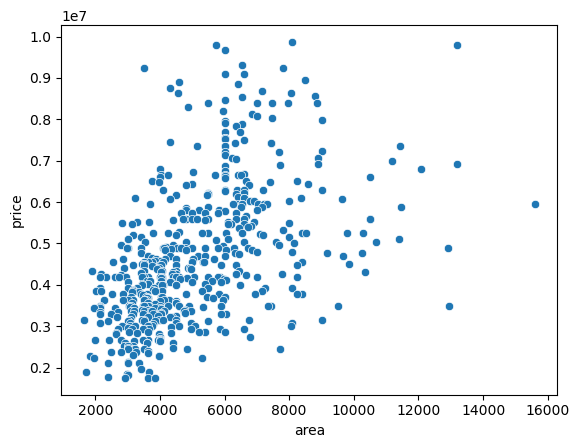

In [36]:
sns.scatterplot(data=df_cleaned, x='area', y='price')

<Axes: ylabel='price'>

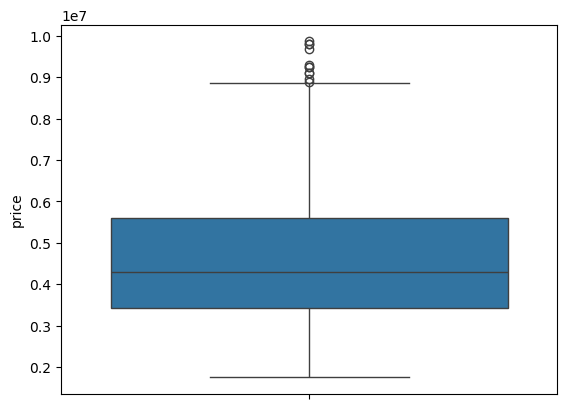

In [38]:
sns.boxplot(y=df_cleaned['price'])

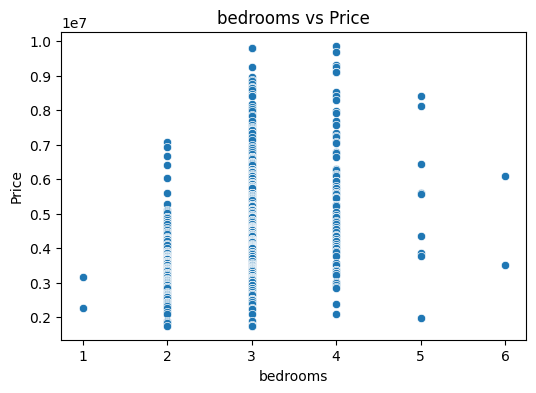

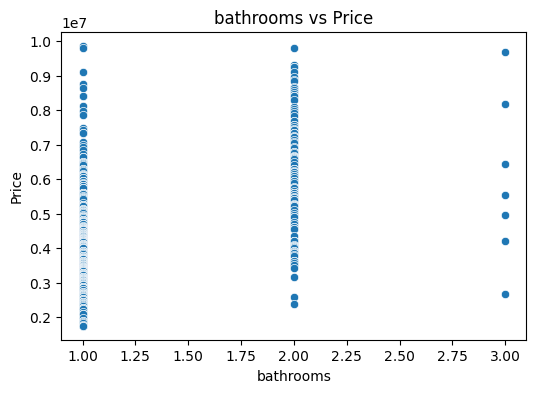

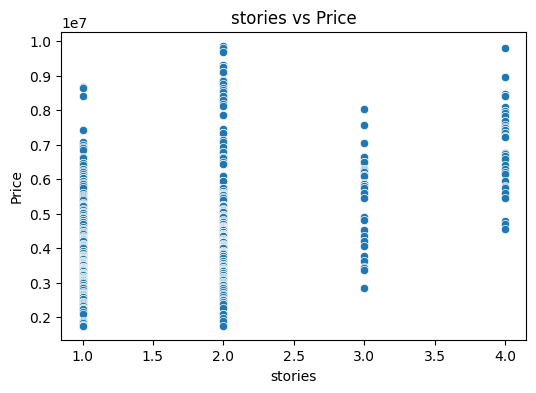

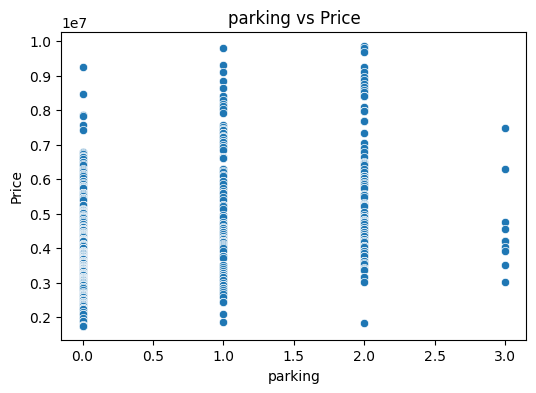

In [39]:
facilities = ['bedrooms', 'bathrooms', 'stories', 'parking']
for feature in facilities:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_cleaned[feature], y=df_cleaned['price'])
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

In [9]:
df_cleaned['facilities']=df_cleaned['bedrooms']+df_cleaned['bathrooms']+df_cleaned['stories']+df_cleaned['parking']
df_cleaned.head()

<ipython-input-9-becf0762ae5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['facilities']=df_cleaned['bedrooms']+df_cleaned['bathrooms']+df_cleaned['stories']+df_cleaned['parking']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,facilities
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,9
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,10
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,1,8
11,9681000,6000,4,3,2,1,1,1,1,0,2,0,0,11
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,0,9


In [10]:
df_cleaned.drop('facilities2',axis=1)

<class 'KeyError'>: "['facilities2'] not found in axis"

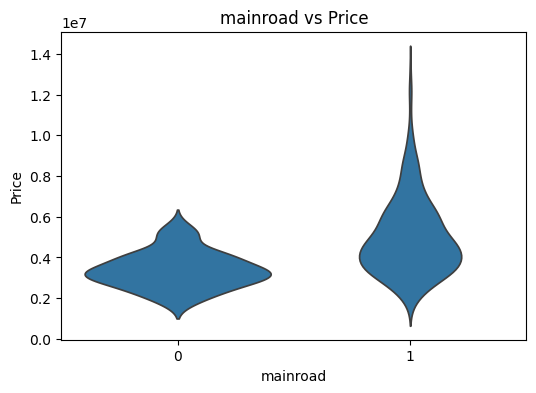

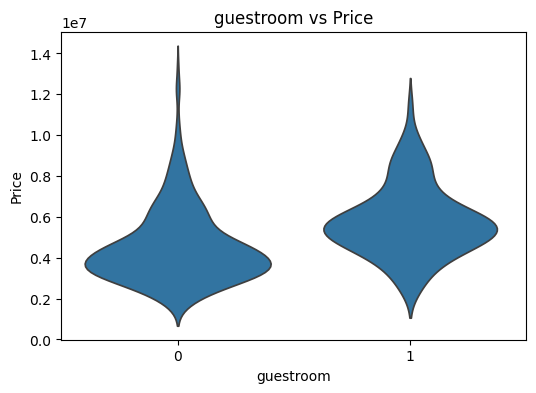

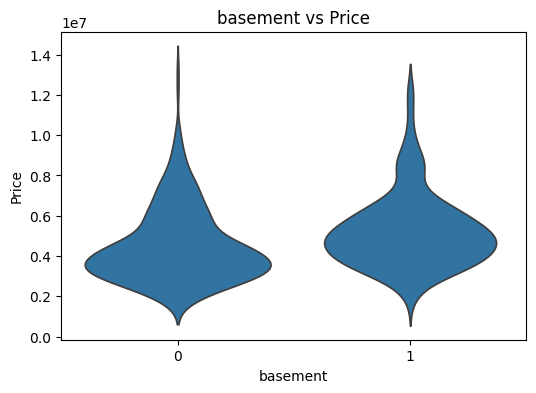

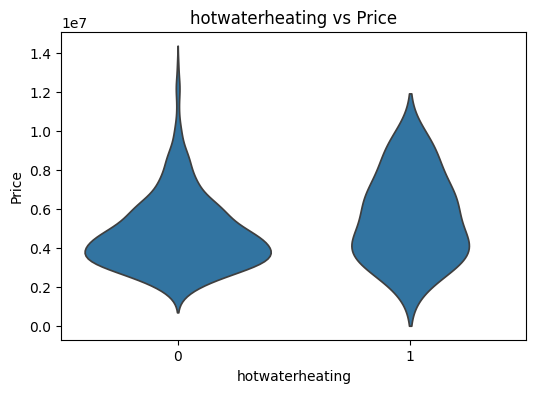

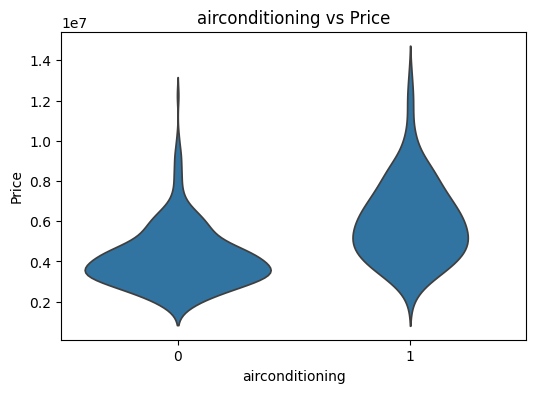

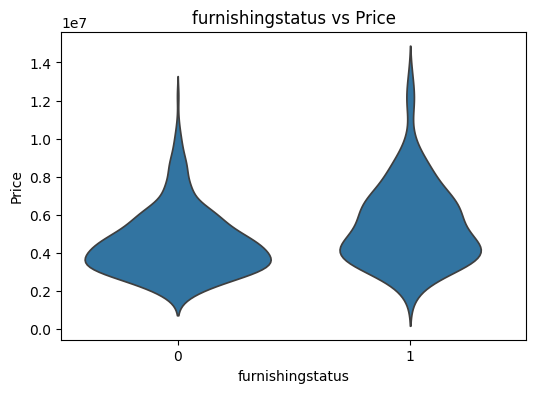

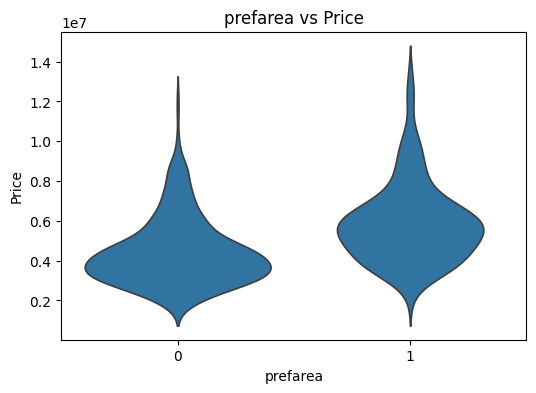

In [48]:
other_facilities=['mainroad','guestroom','basement','hotwaterheating','airconditioning','furnishingstatus','prefarea']
for other in other_facilities:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=df[other], y=df['price'], inner=None)
    plt.title(f'{other} vs Price')
    plt.xlabel(other)
    plt.ylabel('Price')
    plt.show()

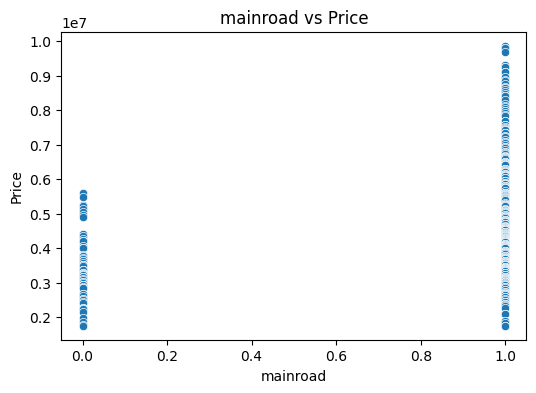

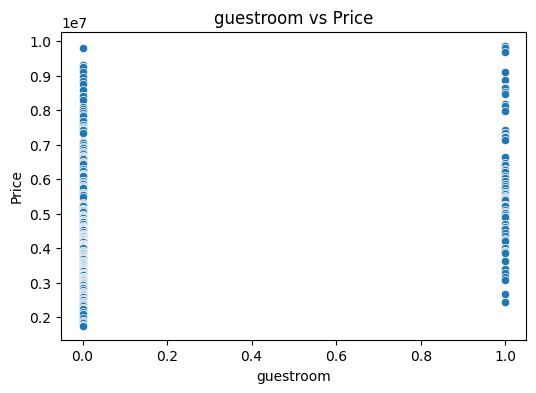

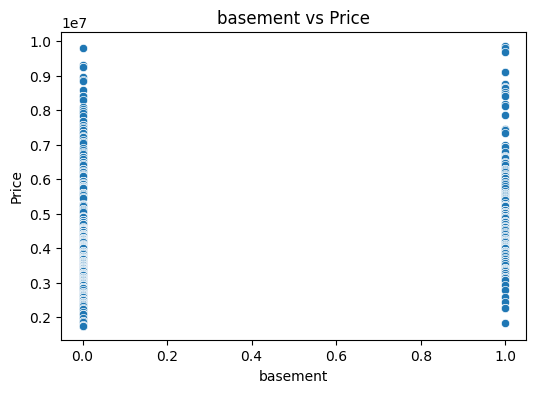

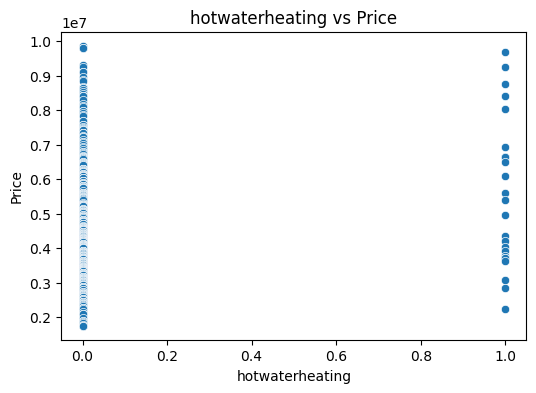

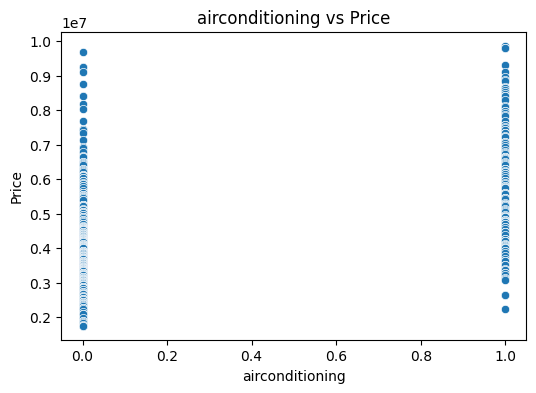

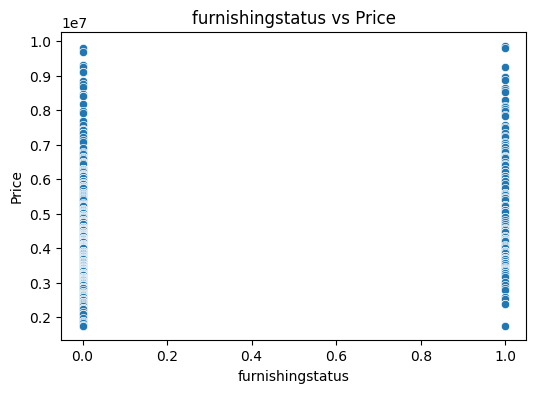

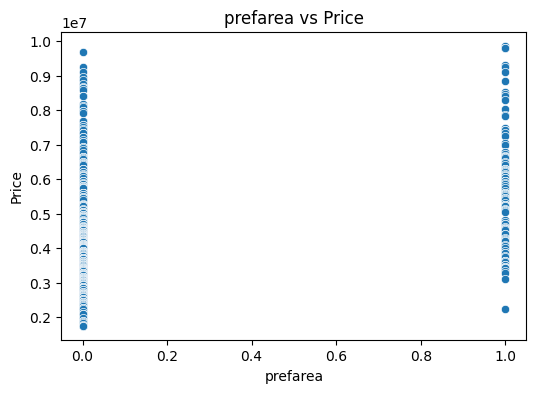

In [49]:
facilities = ['bedrooms', 'bathrooms', 'stories', 'parking']
for other in other_facilities:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_cleaned[other], y=df_cleaned['price'])
    plt.title(f'{other} vs Price')
    plt.xlabel(other)
    plt.ylabel('Price')
    plt.show()

In [11]:
df_cleaned['other_facilities'] = df_cleaned['mainroad']+df_cleaned['guestroom']+df_cleaned['basement']+df_cleaned['hotwaterheating']+df_cleaned['airconditioning']+df['prefarea']

<ipython-input-11-939f1b905727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['other_facilities'] = df_cleaned['mainroad']+df_cleaned['guestroom']+df_cleaned['basement']+df_cleaned['hotwaterheating']+df_cleaned['airconditioning']+df['prefarea']


<Axes: xlabel='other_facilities', ylabel='price'>

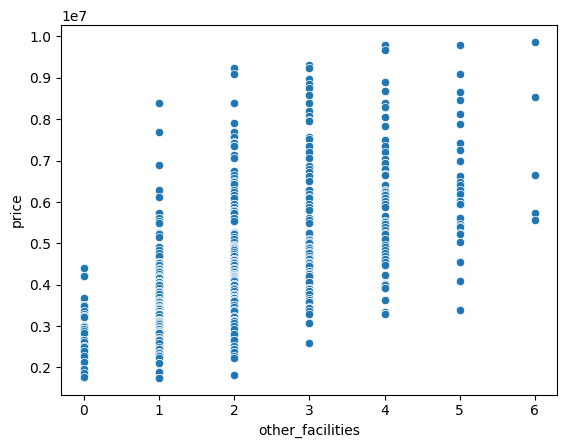

In [55]:
sns.scatterplot(x=df_cleaned['other_facilities'], y=df_cleaned['price'])

In [13]:
X = df_cleaned.drop(columns=['basement','furnishingstatus','airconditioning', 'basement'])
X.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,parking,prefarea,facilities,other_facilities
8,9870000,8100,4,1,2,1,1,0,2,1,9,5.0
9,9800000,5750,3,2,4,1,1,0,1,1,10,4.0
10,9800000,13200,3,1,2,1,0,0,2,1,8,4.0
11,9681000,6000,4,3,2,1,1,1,2,0,11,4.0
12,9310000,6550,4,2,2,1,0,0,1,1,9,3.0


In [14]:
y = X['price']
X =X.drop(columns=['price'])

In [15]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,parking,prefarea,facilities,other_facilities
8,8100,4,1,2,1,1,0,2,1,9,5.0
9,5750,3,2,4,1,1,0,1,1,10,4.0
10,13200,3,1,2,1,0,0,2,1,8,4.0
11,6000,4,3,2,1,1,1,2,0,11,4.0
12,6550,4,2,2,1,0,0,1,1,9,3.0


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_temp,y_train,y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv,X_test,y_cv,y_test = train_test_split(X_temp,y_temp, test_size=0.5, random_state=42)
del X_temp, y_temp

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_cv_poly = poly.transform(X_cv_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [96]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [97]:
yhat_train = model.predict(X_train_poly)

In [98]:
from sklearn.metrics import mean_squared_error, r2_score
print("Validation RMSE:", np.sqrt(mean_squared_error(y_train, yhat_train)))
print("Validation R²:", r2_score(y_train, yhat_train))

Validation RMSE: 477612.352453482
Validation R²: 0.9030691650444613


In [99]:
yhat_cv = model.predict(X_cv_poly)
print("Validation RMSE:", np.sqrt(mean_squared_error(y_cv, yhat_cv)))
print("Validation R²:", r2_score(y_cv, yhat_cv))

Validation RMSE: 8.86656733426292e+18
Validation R²: -2.143606645083443e+25


In [25]:
yhat_test = model.predict(X_test_poly)
print("Validation RMSE:", np.sqrt(mean_squared_error(y_test, yhat_test)))
print("Validation R²:", r2_score(y_test, yhat_test))

Validation RMSE: 2.685709707708454e+18
Validation R²: -2.305877715607422e+24


In [26]:
from sklearn.linear_model import Ridge

In [220]:
ridge = Ridge(alpha=1000)

In [221]:
model2 = ridge.fit(X_train_poly, y_train)
yhat_train_2 = model2.predict(X_train_poly)
print("Validation RMSE:", np.sqrt(mean_squared_error(y_train, yhat_train_2)))
print("Validation R²:", r2_score(y_train, yhat_train_2))

Validation RMSE: 815669.2654859205
Validation R²: 0.7172913806593245


In [222]:
yhat_cv_2 = model2.predict(X_cv_poly)
print("Validation RMSE:", np.sqrt(mean_squared_error(y_cv, yhat_cv_2)))
print("Validation R²:", r2_score(y_cv, yhat_cv_2))

Validation RMSE: 1234557.8886078033
Validation R²: 0.584417760223712


In [223]:
yhat_test_2 = model2.predict(X_test_poly)
print("Validation RMSE:", np.sqrt(mean_squared_error(y_test, yhat_test_2)))
print("Validation R²:", r2_score(y_test, yhat_test_2))

Validation RMSE: 1206431.115385866
Validation R²: 0.5347105626011992
